0.5999355193623647


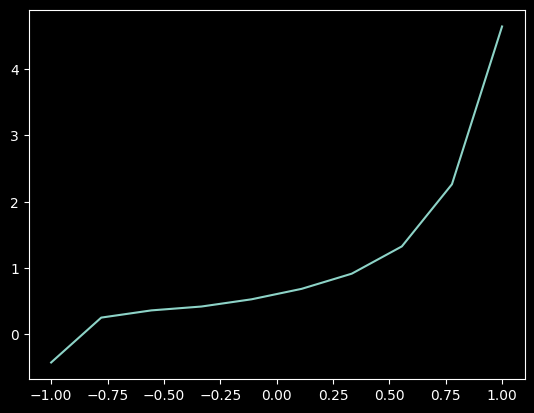

In [1]:
from optimizer.adam import Adam
%load_ext autoreload
%autoreload 2

import random

import numpy as np
import matplotlib.pyplot as plt

NUMBER_OF_COEFFS = 8
random.seed(42)
coeffs = np.random.random(NUMBER_OF_COEFFS)
print(np.polyval(coeffs, 0))

indices = np.linspace(-1, 1, 10)
values = np.apply_along_axis(lambda x: np.polyval(coeffs, x), 0, indices)

plt.plot(indices, values)
plt.show()

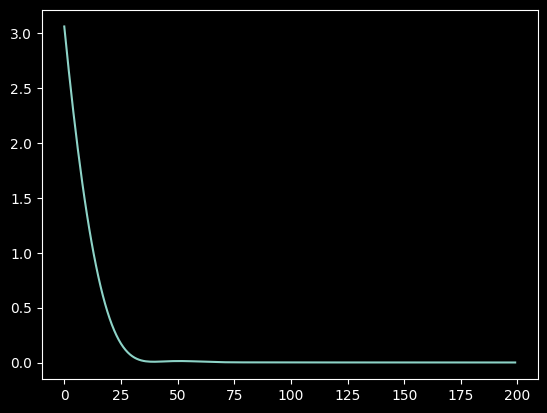

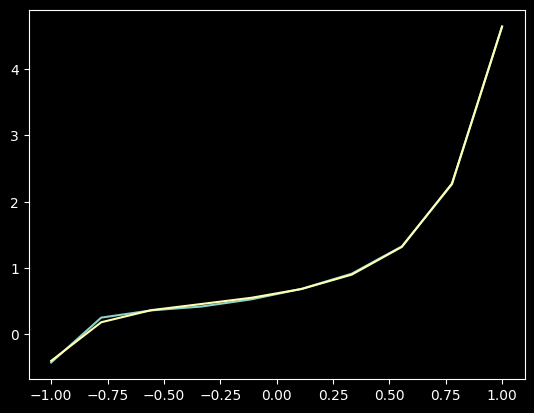

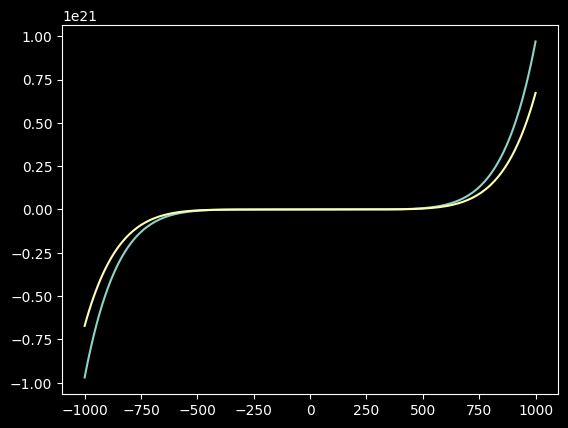

[0.6717769] [0.46112601] [0.64819603] [0.49771227] [0.61479902] [0.55147448] [0.58791449] [0.60982287]
0.9693041121375383 0.0832389265552359 0.6197066033863732 0.9366620792778545 0.23870184977796893 0.48957148285508123 0.7081450571173952 0.5999355193623647


In [11]:
from poly.polynomial import compute_polynomial
from loss.mse import mse_loss
from automatic_diff_engine.tensor import Tensor

params = [Tensor(0) for i in range(NUMBER_OF_COEFFS)]
optimizer = Adam(
    parameters=params,
    learning_rate = 2e-2,
)

losses = []
epochs = 200
for epoch in range(epochs):
    optimizer.zero_grad()
    x = Tensor(indices, requires_grad=False)
    y = Tensor(values, requires_grad=False)

    y_pred = compute_polynomial(params, x)
    loss = mse_loss(y_pred, y)

    loss.backward()
    optimizer.step()

    losses.append(loss.value)

params_value = [p.value for p in params]


plt.plot(losses)
plt.show()

plt.plot(indices, values)
plt.plot(indices, [np.polyval(params_value, x) for x in indices])
plt.show()

extended_indices = np.linspace(-1000, 1000, 200)
extended_values = np.polyval(coeffs, extended_indices)
plt.plot(extended_indices, extended_values)
plt.plot(extended_indices, [np.polyval(params_value, x) for x in extended_indices])
plt.show()

print(*[p.value for p in params])
print(*coeffs)

In [10]:
def test_for_value(coeffs, weights, x):
    true_value = np.polyval(coeffs, x)
    predicted_value = np.polyval(weights, x)
    print(f"True value: {true_value} - Predicted value: {predicted_value} - Difference: {abs(true_value-predicted_value)}")

test_for_value(coeffs, params_value, 0.5)

True value: 1.193019157771269 - Predicted value: [1.1823151] - Difference: [0.01070405]
